# Tariff recommendation

You have at your disposal data on the behavior of customers who have already switched to these tariffs (from the draft course "Statistical Data Analysis"). You need to build a model for the classification problem that will select the appropriate rate. Data preprocessing is not required - you have already done it.

Build the model with the largest possible *accuracy* value. To pass the project successfully, you need to bring the percentage of correct answers to at least 0.75. Check *accuracy* on the test set yourself.

## Open and examine the file

In [50]:
import warnings

import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm, tqdm_notebook # progress bar for loops

I disabled it in this project so that the output is not clogged, probably not included in best practices? =)

In [51]:
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [53]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [55]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [56]:
print('Тариф ультра', df[df['is_ultra']==1]['is_ultra'].count())
print('Тариф не ультра', df[df['is_ultra']==0]['is_ultra'].count())

Тариф ультра 985
Тариф не ультра 2229


### Conclusions
The data is distributed adequately, there are no noticeable outliers, there are no Nulls. We can work.

I looked at the ratio of ultra / non-ultra tariffs, there is an imbalance in the data.\
30% ultra and 70% non-ultra.

## Split the data into samples

### Divide the data into samples in the ratio:
- Educational 60%,
- Validation 20%,
- Test 20%.

In [57]:
df_train, df_valid_and_test = train_test_split(
    df,test_size=0.4, random_state=12345)

df_valid, df_test = train_test_split(
    df_valid_and_test,test_size=0.5, random_state=12345)

print('Размеры выборок:')
print('Обучающей:', df_train.shape[0])
print('Валидационной:', df_valid.shape[0])
print('Тестовой:', df_test.shape[0])

Размеры выборок:
Обучающей: 1928
Валидационной: 643
Тестовой: 643


### Let's prepare the data for the models:

In [58]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

## Explore Models

Explore the quality of different models by changing hyperparameters. Briefly write the conclusions of the study.

**Preliminarily** I want to note that I do not take into account the interdependence of hyperparameters and explore their influence on the model consistently and cumulatively. Perhaps this approach is not entirely correct?

### decision tree

In [59]:
best_model_dt = None
best_result = 0
best_depth = 0

for depth in tqdm_notebook(range(1,31), desc ='Depth loop'):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    print(depth, 'depth', 'оценка лучшей модели:', result)
    if result > best_result:
        best_model_dt = model
        best_result = result
        best_depth = depth
print('Оценка лучшей модели:', best_result, 'лучшee max_depth:', best_depth)

Depth loop:   0%|          | 0/30 [00:00<?, ?it/s]

1 depth оценка лучшей модели: 0.7542768273716952
2 depth оценка лучшей модели: 0.7822706065318819
3 depth оценка лучшей модели: 0.7853810264385692
4 depth оценка лучшей модели: 0.7791601866251944
5 depth оценка лучшей модели: 0.7791601866251944
6 depth оценка лучшей модели: 0.7838258164852255
7 depth оценка лучшей модели: 0.7822706065318819
8 depth оценка лучшей модели: 0.7791601866251944
9 depth оценка лучшей модели: 0.7822706065318819
10 depth оценка лучшей модели: 0.7744945567651633
11 depth оценка лучшей модели: 0.7620528771384136
12 depth оценка лучшей модели: 0.7620528771384136
13 depth оценка лучшей модели: 0.7558320373250389
14 depth оценка лучшей модели: 0.7589424572317263
15 depth оценка лучшей модели: 0.7465007776049767
16 depth оценка лучшей модели: 0.7340590979782271
17 depth оценка лучшей модели: 0.7356143079315708
18 depth оценка лучшей модели: 0.7309486780715396
19 depth оценка лучшей модели: 0.7278382581648523
20 depth оценка лучшей модели: 0.7216174183514774
21 depth 

- Tried plotting the tree_plot below.
- now there is not enough time for this and for this I use the usual print () inside the loop, added to the code. print(depth, 'depth', 'best model score:', result). The graphics are good, maybe I'll use them later.
- corrected further

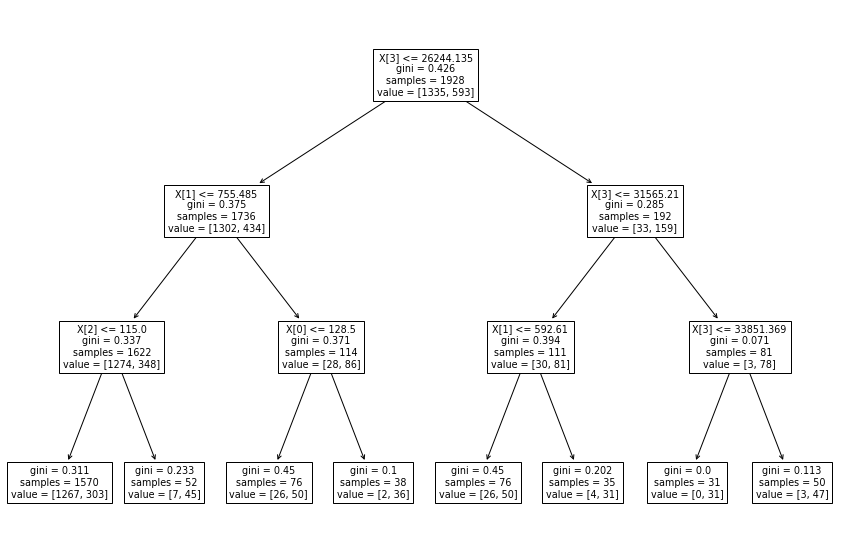

In [60]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
plt.figure(figsize=(15,10))
tree.plot_tree(best_model_dt)
plt.show()

#### It doesn't make sense that below:

In [61]:
best_model = None
best_result = 0
best_smpl = 0
for smpl in tqdm_notebook(range(2,21), desc ='Depth loop'):
    model = DecisionTreeClassifier(random_state=12345,  
                                   max_depth=3, 
                                   min_samples_split=smpl)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_smpl = smpl

print('Best smpl = %d. ' % best_smpl)
print('Accuracy наилучшей модели на валидационной выборке: %f' % best_result)

Depth loop:   0%|          | 0/19 [00:00<?, ?it/s]

Best smpl = 2. 
Accuracy наилучшей модели на валидационной выборке: 0.785381


In [62]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3, criterion='gini')
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid) 
print("criterion='gini', Оценка:",result)

model = DecisionTreeClassifier(random_state=12345, max_depth=3, criterion='entropy')
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid) 
print("criterion='entropy', Оценка:",result)

criterion='gini', Оценка: 0.7853810264385692
criterion='entropy', Оценка: 0.7853810264385692


- now there is not much time, but I will try to figure it out and apply it on the next projects

### Random Forest

**Hyperparameters:**
- [x] n_estimators
- [x] max_depth
- [x] min_samples_leaf
- [x] min_samples_split
- [x] criterion='entropy'/'gini'

#### Iterate over n_estimators

In [63]:
best_model_rf = None
best_result = 0
best_est = 0

for est in tqdm_notebook(range(1,31), desc ='Est loop'):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_rf = model
        best_result = result
        best_est = est
print('Best est = %d. ' % best_est)
print('Accuracy наилучшей модели на валидационной выборке: %f' % best_result)

Est loop:   0%|          | 0/30 [00:00<?, ?it/s]

Best est = 23. 
Accuracy наилучшей модели на валидационной выборке: 0.794712


#### Iterate over max_depth

In [64]:
best_model_rf = None
best_result = 0
best_depth = 0
for depth in tqdm_notebook(range(1,21), desc ='Depth loop'):
    model = RandomForestClassifier(random_state=12345, 
                                   n_estimators=23, 
                                   max_depth=depth)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_rf = model
        best_result = result
        best_depth = depth
print('Best depth = %d. ' % best_depth)
print('Accuracy наилучшей модели на валидационной выборке: %f' % best_result)

Depth loop:   0%|          | 0/20 [00:00<?, ?it/s]

Best depth = 6. 
Accuracy наилучшей модели на валидационной выборке: 0.800933


#### Iterate min_samples_leaf

In [65]:
best_model_rf = None
best_result = 0
best_smpl = 0
for smpl in tqdm_notebook(range(1,21), desc ='Depth loop'):
    model = RandomForestClassifier(random_state=12345, 
                                   n_estimators=23, 
                                   max_depth=6, 
                                   min_samples_leaf = smpl)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_rf = model
        best_result = result
        best_smpl = smpl

print('Best min_samples_leaf = %d. ' % best_smpl)
print('Accuracy наилучшей модели на валидационной выборке: %f' % best_result)

Depth loop:   0%|          | 0/20 [00:00<?, ?it/s]

Best min_samples_leaf = 1. 
Accuracy наилучшей модели на валидационной выборке: 0.800933


#### Iterate min_samples_split

In [66]:
best_model_rf = None
best_result = 0
best_smps = 0

for smps in tqdm_notebook(range(2,61), desc ='Depth loop'):
    model = RandomForestClassifier(random_state=12345, 
                                   n_estimators=23, 
                                   max_depth=6, 
                                   min_samples_leaf=1, 
                                   min_samples_split=smps)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model_rf = model
        best_result = result
        best_smps = smps

print('Best min_samples_split = %d. ' % best_smps)
print('Accuracy наилучшей модели на валидационной выборке: %f' % best_result)

Depth loop:   0%|          | 0/59 [00:00<?, ?it/s]

Best min_samples_split = 12. 
Accuracy наилучшей модели на валидационной выборке: 0.804044


#### Criteria search

In [67]:
model = RandomForestClassifier(random_state=12345, 
                               n_estimators=23, 
                               max_depth=6, 
                               min_samples_leaf=1, 
                               min_samples_split=12, 
                               criterion='gini')
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid) 
print("criterion='gini', оценка:",result)

model = RandomForestClassifier(random_state=12345, 
                               n_estimators=23, 
                               max_depth=6, 
                               min_samples_leaf=1, 
                               min_samples_split=12, 
                               criterion='entropy')
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid) 
print("criterion='entropy', оценка:",result)

criterion='gini', оценка: 0.8040435458786936
criterion='entropy', оценка: 0.8009331259720062


- GreedSearch will study a little later
- I agree, but it's still interesting how they influence learning =)
- Thank you, I appreciate it! =)

### Logistic regression

#### Hyperparameters:

- [x] max_iter

In [68]:
best_model_lr = None
best_result = 0
best_iter = 0

for n_iter in tqdm_notebook(range(1,31), desc ='Iter loop'):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=n_iter)
    model.fit(features_valid, target_valid)
    result = model.score(features_valid, target_valid)  
    if result > best_result:
        best_model_lr = model
        best_result = result
        best_iter = n_iter
        
print('Итераций:', best_iter, '\nОценка лучшей модели:', best_result)

Iter loop:   0%|          | 0/30 [00:00<?, ?it/s]

Итераций: 27 
Оценка лучшей модели: 0.7122861586314152


### Conclusions
The RandomForestClassifier model performed the best. For it, you can pick up quite a lot of hyperparameters that will affect the simulation result.

DecisionTreeClassifier performs worse and LogisticRegression has the worst result.

- I think this is a retraining that we will see only on the validation set. On the train, the quality could continue to rise.
- Yes, they just briefly said that this is the same dt, only we are building several dt? and then we take the average of them. It is clear that you need to look at the hood)
- As we were explained in theory, logistic regression is a classification algorithm. And it works the fastest due to the smallest number of parameters compared to other models, but they didn’t look under the hood.


## Check the model on the test set

Here I assume that the model is in the singular because you need to choose the best of the models and test it on the test sample.

In [69]:
print('Модель RandomForestClassifier.\nПроверка на тестовой выборке.')
model = RandomForestClassifier(random_state=12345, 
                               n_estimators=23, 
                               max_depth=6, 
                               min_samples_leaf=1, 
                               min_samples_split=12, 
                               criterion='gini')
model.fit(features_train, target_train)
result = model.score(features_test, target_test) 
print('Оценка модели: %f' % result)

Модель RandomForestClassifier.
Проверка на тестовой выборке.
Оценка модели: 0.802488


### Conclusion
On test data, the modelol behaves almost the same as on validation data.

- I also thought about it :D But I thought that here we are still honestly fulfilling the task and remember that we may not be given a test sample. Like a hackathon.
- It can help to allocate the time of managers who make cold calls (or any other business contact with the client). If we assume that a person will switch to Ultra, then, accordingly, it is possible to build a calling script in a different way or even refuse it in favor of a specific offer in an SMS mailing list or Push notifications in an application.
- I'll read about them first =)

## (bonus) Check models for adequacy

To test for adequacy, let's take the DummyClassifier model designed for this test and train it on a validation set. Let's check on the validation and test samples.

In [70]:
model = DummyClassifier(strategy="most_frequent")
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)
print('Оценка модели на валидационной выборке:', result)
result = model.score(features_test, target_test)
print('Оценка модели на тестовой выборке:', result)

Оценка модели на валидационной выборке: 0.7060653188180405
Оценка модели на тестовой выборке: 0.6842923794712286


### Conclusion
RandomForestClassifier model score is about 0.10 - 0.12 better than DummyClassifier.\
Hope the RandomForestClassifier model works.

There will be more time soon, but for now I'll read =)

## Project readiness checklist

Put 'x' in completed items. Then press Shift+Enter.

- [x] Jupyter Notebook open
- [x] All code is executed without errors
- [x] Cells with code are arranged in execution order
- [x] Task 1 completed: data loaded and studied
- [x] Task 2 completed: data split into three samples
- [x] Completed Task 3: Researched Models
- [x] More than one model considered
- [x] Considered at least 3 values ​​of hyperparameters for some model
- [x] Written conclusions on the results of the study
- [x] Task 3 completed: Tested
- [x] It was possible to achieve an accuracy of at least 0.75
